In [134]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline
from sklearn.model_selection import train_test_split

In [135]:
df = pd.read_csv("LoanPrediction.csv")

In [136]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Y,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,N,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,1.0,Urban


In [137]:
df.shape

(614, 13)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Loan_Status          614 non-null object
Credit_History       564 non-null float64
Property_Area        614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


checking for NA values in each column

In [139]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Loan_Status           0
Credit_History       50
Property_Area         0
dtype: int64

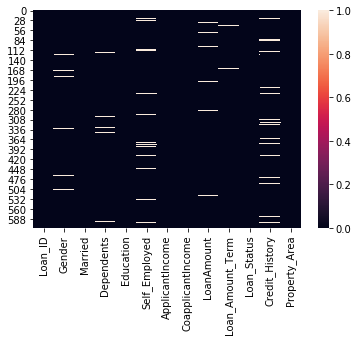

In [140]:
sb.heatmap(df.isnull())

there is already some NA values 
lets remove NA's values

<b>1.Imputing NA values </b><br>
Filling LoanAmount with Average LoanAmount from that Column

In [141]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

Filling other NA values with most repeating values from that column

In [142]:
df['Gender'].fillna("Male",inplace=True)
df['Married'].fillna("Yes",inplace=True)
df['Dependents'].fillna(0,inplace=True)
df['Self_Employed'].fillna("No",inplace=True)
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)

In [143]:
df.Credit_History.value_counts()
df.Loan_Amount_Term.value_counts()
df.Self_Employed.value_counts()
df.Dependents.value_counts()
df.Married.value_counts()
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

After imputing NA values lets check

In [144]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
Credit_History       0
Property_Area        0
dtype: int64

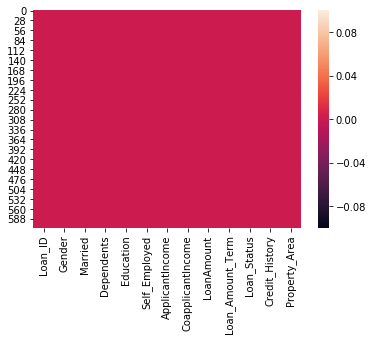

In [145]:
sb.heatmap(df.isnull())

<b>2.Outlier detection, here treating outliers is not neccessary for this dataset

In [146]:
hq = df["LoanAmount"].quantile(0.99)
lq = df["LoanAmount"].quantile(0.01)

In [147]:
hq

495.87

In [148]:
lq

30.65

<b>3.Countplot</b><br>
lets check if data is balanced or not!

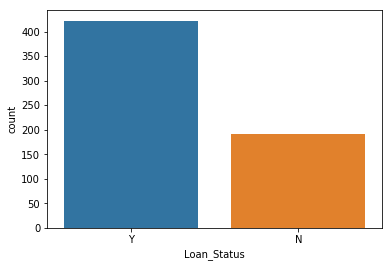

In [149]:
sb.countplot(data=df,x="Loan_Status")

In [150]:
#i.e
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64

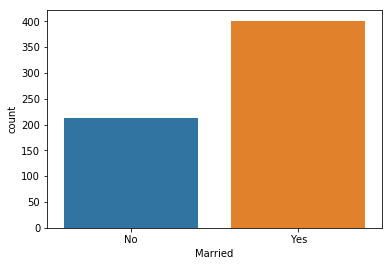

In [151]:
sb.countplot(data = df, x = "Married")
df["Loan_Status"].value_counts()

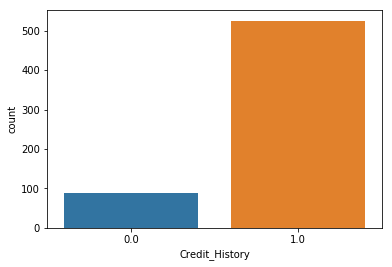

In [152]:
sb.countplot(data=df,x="Credit_History")

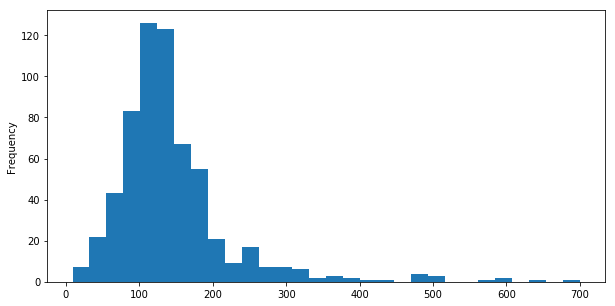

In [153]:
df['LoanAmount'].plot.hist(figsize=(10,5),bins=30)

<b>4.Converting all the nominal value columns to integer before model Building

In [154]:
df["Gender"]=df["Gender"].map({'Male':0, 'Female':1}).astype(int)

In [155]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,Y,1.0,Urban
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,N,1.0,Rural


In [156]:
df["Married"]=df["Married"].map( {'No':0, 'Yes':1}).astype(int)

In [157]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,0,0,0,Graduate,No,5849,0.0,146.412162,360.0,Y,1.0,Urban
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.000000,360.0,N,1.0,Rural


In [158]:
df["Education"]=df["Education"].map( {'Not Graduate':0, 'Graduate':1}).astype(int)

In [159]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,0,0,0,1,No,5849,0.0,146.412162,360.0,Y,1.0,Urban
1,LP001003,0,1,1,1,No,4583,1508.0,128.000000,360.0,N,1.0,Rural


In [160]:
df["Self_Employed"]=df["Self_Employed"].map( {'No':0, 'Yes':1}).astype(int)

In [161]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,Y,1.0,Urban
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,N,1.0,Rural


In [162]:
df["Property_Area"]=df["Property_Area"].map( {'Semiurban':0, 'Urban':1, 'Rural':2}).astype(int)

In [163]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,Y,1.0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,N,1.0,2


In [164]:
loanid = df.Loan_ID

To drop loanid column


In [165]:
df=df.drop('Loan_ID', axis=1)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,Y,1.0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,N,1.0,2


In [166]:
df["Total_Income"] = df.ApplicantIncome + df.CoapplicantIncome 

<b>5.Pearson Correlation between variables

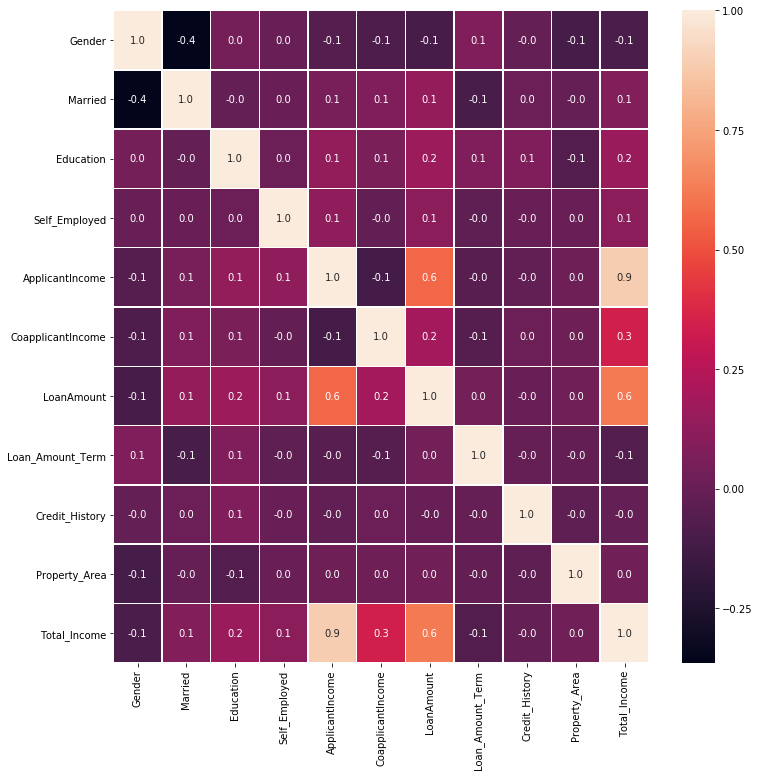

In [167]:
plt.subplots(figsize=(12,12))
sb.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

Here we can conclude that loan amount has good correlation with Applicant income.

lets see the correlation with of all the input variables with Loan_Status column

In [168]:
df2 = df

In [169]:
df2["Loan_Status"]=df["Loan_Status"].map( {'N':0, 'Y':1}).astype(int)

In [170]:
df2.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area,Total_Income
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1,1.0,1,5849.0
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,0,1.0,2,6091.0


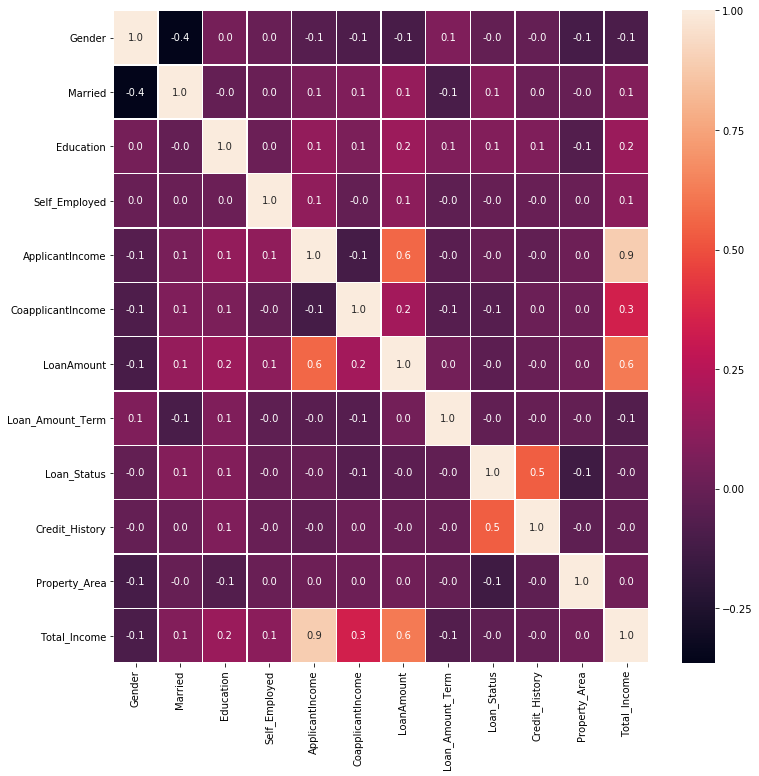

In [171]:
plt.subplots(figsize=(12,12))
sb.heatmap(df2.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

<b>6.Lets split data for test and train(model building)

In [172]:
m_train,m_test=train_test_split(df,test_size=0.2, random_state=0)
x_train=m_train.drop('Loan_Status',axis=1)
y_train=m_train['Loan_Status']

x_test=m_test.drop('Loan_Status',axis=1)
y_test=m_test['Loan_Status']

In [173]:
#to get dummy variables for nominal columns i.e independent column
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [174]:
x_train.shape

(491, 16)

In [175]:
list(x_train)

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Total_Income',
 'Dependents_0',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+']

In [189]:
x_test.drop('Dependents_0',axis=1,inplace=True)
x_test.shape

(123, 14)

In [190]:
x_train.drop('Dependents_0',axis=1,inplace=True)
x_train.shape

(491, 14)

<b>7.lets Find Feature Importance using RandomForest Model

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier(n_estimators=70)

rfmodel.fit(x_train, y_train)
for i, j in sorted(zip(x_train.columns, rfmodel.feature_importances_)):
    print(i, j)

ApplicantIncome 0.15348193628202078
CoapplicantIncome 0.08615217161935636
Credit_History 0.24487620786624187
Dependents_1 0.015572847778692694
Dependents_2 0.013232366318846151
Dependents_3+ 0.015116822222127855
Education 0.020111491603117197
Gender 0.015240381498204487
LoanAmount 0.14893462890726863
Loan_Amount_Term 0.034637378229635946
Married 0.01991038294848727
Property_Area 0.046010431750044066
Self_Employed 0.018483791881415645
Total_Income 0.16823916109454104


<b>8.Model Building</b> <br>
Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
predictions=logmodel.predict(x_test)

<b>9.Measuring Metrics

In [201]:
from sklearn.metrics import classification_report

In [202]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.88      0.45      0.60        33\n          1       0.83      0.98      0.90        90\n\navg / total       0.84      0.84      0.82       123\n'

In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
confusion_matrix(y_test,predictions)

array([[15, 18],
       [ 2, 88]])

In [207]:
from sklearn.metrics import accuracy_score

In [208]:
accuracy_score(y_test,predictions)

0.8373983739837398